In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

## NHL Player Stats 2004 - 2018

via https://www.kaggle.com/xavya77/nhl04to18

## Predict Hart Trophy Winner

In [2]:
df = pd.read_csv('NHL.csv', encoding = "ISO-8859-1")

In [3]:
df.head()

,Rk,Player,Age,Pos,Tm,GP,G,A,PTS,plusminus,...,TOI,ATOI,BLK,HIT,FOW,FOL,FO_percent,HART,Votes,Season
0,1,Connor McDavid\mcdavco01,20,C,EDM,82,30,70,100,27,...,1733,21.133333,29,34,348,458,43.2,1,1604,2017
1,2,Sidney Crosby\crosbsi01,29,C,PIT,75,44,45,89,17,...,1491,19.883333,27,80,842,906,48.2,0,1104,2017
2,3,Patrick Kane\kanepa01,28,RW,CHI,82,34,55,89,11,...,1754,21.400000,15,28,7,44,13.7,0,206,2017
3,4,Nicklas Backstrom\backsni02,29,C,WSH,82,23,63,86,17,...,1497,18.266667,33,45,685,648,51.4,0,60,2017
4,5,Nikita Kucherov\kucheni01,23,RW,TBL,74,40,45,85,13,...,1438,19.433333,20,30,0,0,0.0,0,119,2017


import time
start_time = time.time()
main()
print("--- %s seconds ---" % (time.time() - start_time))

simplest decision tree vs. simplest random forest

In [4]:
df.dtypes

Rk              int64
Player         object
Age             int64
Pos            object
Tm             object
GP              int64
G               int64
A               int64
PTS             int64
plusminus       int64
PIM             int64
PS            float64
EV              int64
PP              int64
SH              int64
GW              int64
EV.1            int64
PP.1            int64
SH.1            int64
S               int64
S_percent     float64
TOI             int64
ATOI          float64
BLK             int64
HIT             int64
FOW             int64
FOL             int64
FO_percent    float64
HART            int64
Votes           int64
Season          int64
dtype: object

In [5]:
HART = df['HART']

In [6]:
df_2 = df[['G', 'A', 'PTS', 'TOI', 'Votes']]

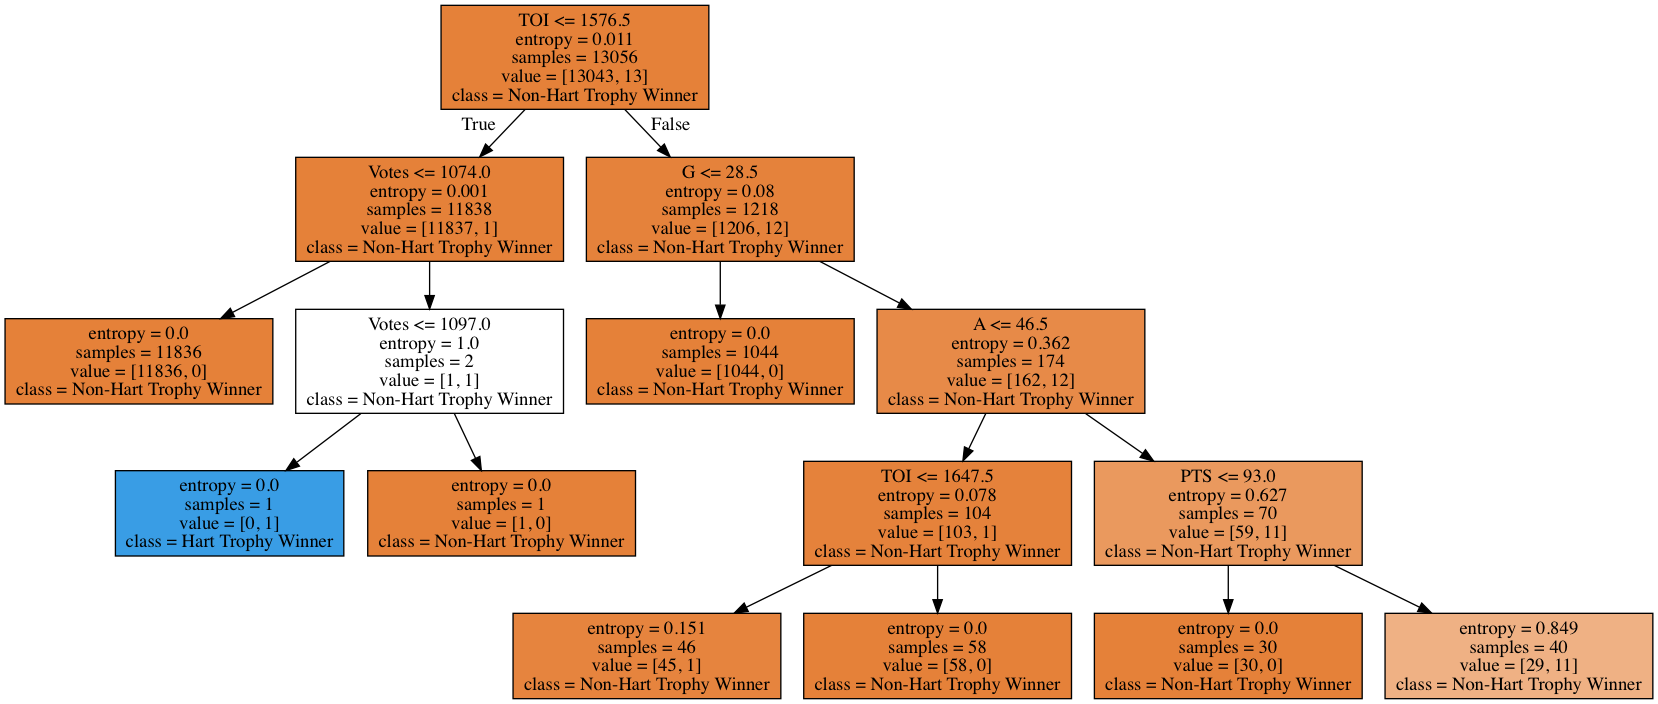

In [8]:
# This is the model we'll be using.
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
)
decision_tree.fit(df_2, HART)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=df_2.columns,
    class_names=['Non-Hart Trophy Winner', 'Hart Trophy Winner'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [12]:
cross_val_score(decision_tree, df_2, HART, cv=10).mean()

0.9992343027670048

In [14]:
import time
start_time = time.time()
decision_tree.fit(df_2, HART)
cross_val_score(decision_tree, df_2, HART, cv=10).mean()
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.9804751873016357 seconds ---


In [13]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier(n_jobs= -1)
X = df.drop('HART', 1)
Y = df['HART']
X = pd.get_dummies(X)
X = X.dropna(axis=1)
X = X[['G', 'A', 'PTS', 'TOI', 'Votes']]
cross_val_score(rfc, X, Y, cv=10).mean()

0.9995405816602029

In [15]:
start_time = time.time()
cross_val_score(rfc, X, Y, cv=10).mean()
print("--- %s seconds ---" % (time.time() - start_time))

--- 5.0785627365112305 seconds ---


In [16]:
# Random forest took longer, and both are very close in accuracy.  The decision tree would be better in this instance.